In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify

<Axes: xlabel='Years', ylabel='Months'>

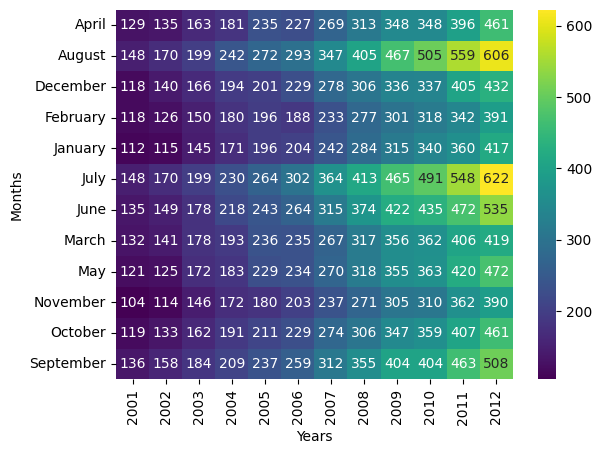

In [4]:
# Задание 1 Использование тепловых карт для поиска шаблонов в данных о пассажирах рейса

# С помощью pandas считывать данные, расположенные в подкаталоге. 
# Данный набор данных содержит ежемесячные данные по пассажирам рейсов 
# за период с 2001 по 2012 год
flight_details = pd.read_csv('data/flight_details.csv')

# Используйте тепловую карту для визуализации данных.
# Используйте собственную цветную карту. Убедитесь, что наименьшее 
# значение - самый темный цвет, а наибольшее - самый яркий.
sns.heatmap(flight_details.pivot_table(index='Months', columns='Years', values='Passengers'), annot=True, fmt='g', cmap='viridis')

C:\Users\SilkSlime\AppData\Local\Temp\ipykernel_3440\3710347037.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  homicide_data_b['year'] = homicide_data_b['reported_date'].astype(str).str[:4]


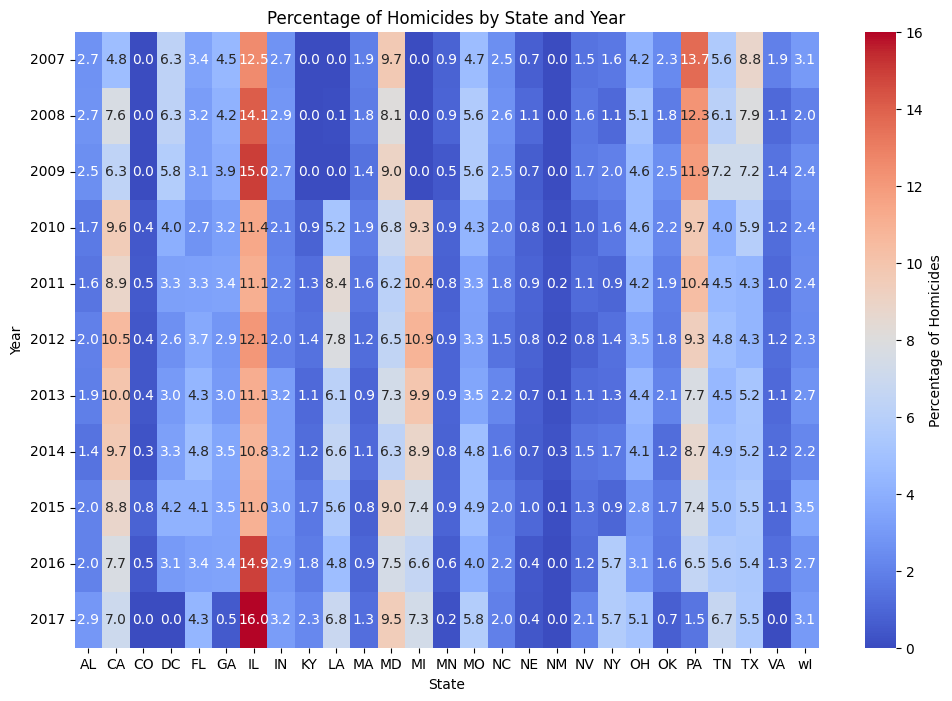

In [5]:
# Построить тепловую карту. Оси - года и штаты. Значения - процент
# убийств от общего количества убийств в этот год

homicide_data = pd.read_csv('data/homicide-data.csv', encoding='ISO-8859-1')
homicide_data_b = homicide_data[homicide_data['victim_race'] == 'Black']
homicide_data_b['year'] = homicide_data_b['reported_date'].astype(str).str[:4]
homicides_by_year_state = homicide_data_b.groupby(['year', 'state']).size().unstack(fill_value=0)

total_homicides_per_year = homicides_by_year_state.sum(axis=1)
percentage_homicides = (homicides_by_year_state.T / total_homicides_per_year).T * 100

plt.figure(figsize=(12, 8))
sns.heatmap(percentage_homicides, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'label': 'Percentage of Homicides'})
plt.yticks(rotation=0)
plt.title('Percentage of Homicides by State and Year')
plt.xlabel('State')
plt.ylabel('Year')
plt.show()

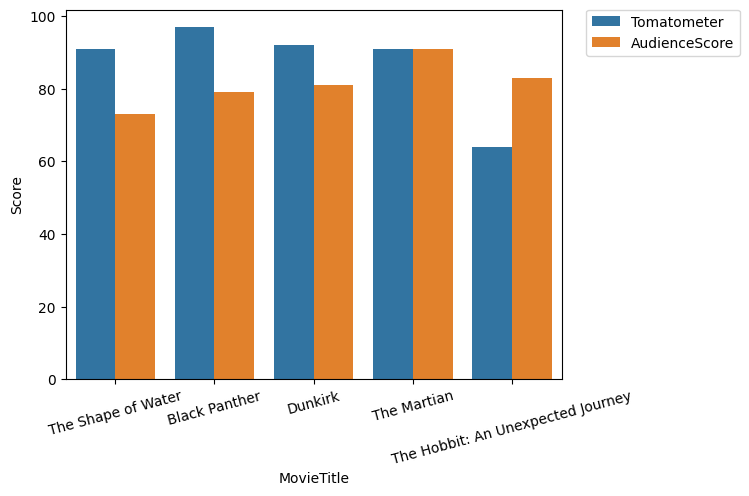

In [6]:
# Задание 2 Пересмотр сравнения фильмов
# В этом упражнении мы будем использовать сюжет бара для сравнения 
# баллов фильмов. Вам будут предложены пять фильмов с оценкой "Гнилые 
# помидоры". Томатометр - это процент от одобренных критиков Томатометра, 
# которые дали положительный отзыв на фильм. Оценка зрительских симпатий 
# - это процент пользователей, которые дали оценку 3,5 или выше из 5. Сравните 
# эти два балла среди пяти фильмов

movie_scores = pd.read_csv('data/movie_scores.csv', index_col=0)
sns.barplot(x='MovieTitle', y='Score', hue='ScoreType', data=movie_scores.melt(id_vars='MovieTitle', var_name='ScoreType', value_name='Score'))
plt.xticks(rotation=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

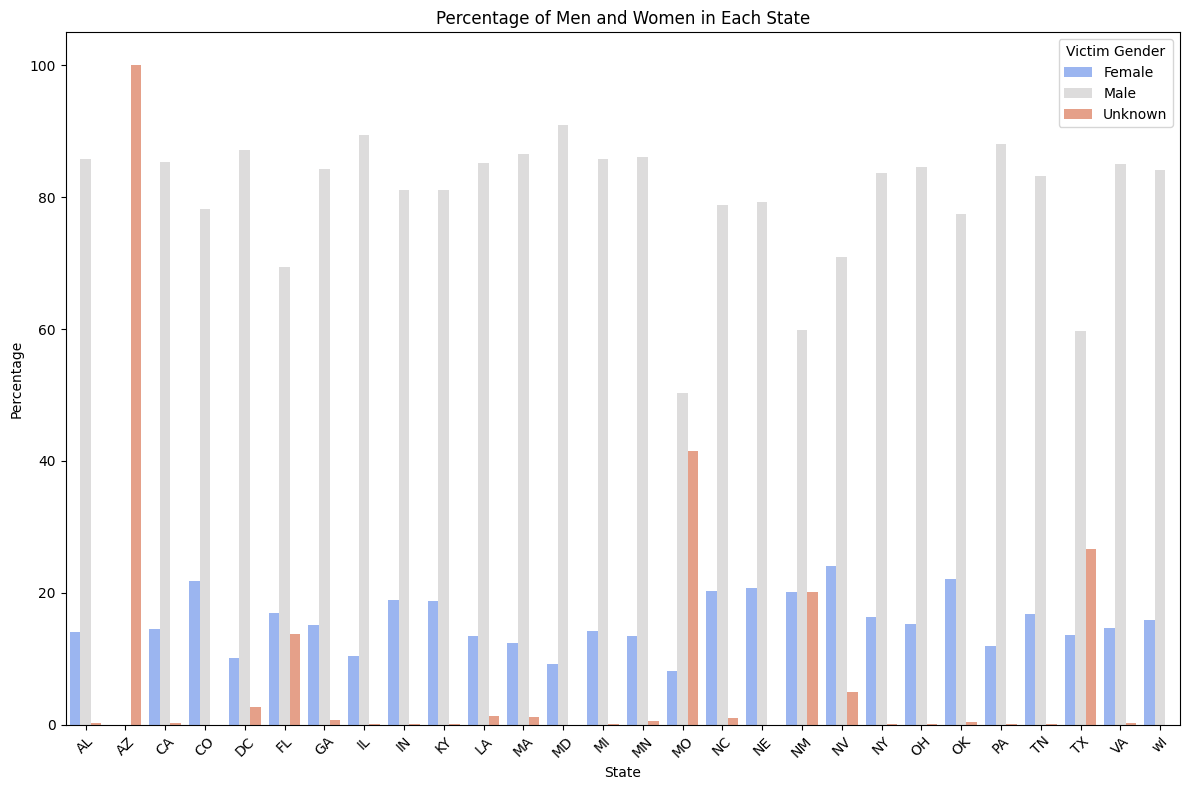

In [11]:
# Процент male female по годам
state_gender_counts = homicide_data.groupby(['state', 'victim_sex']).size().unstack(fill_value=0)
state_gender_percentage = state_gender_counts.div(state_gender_counts.sum(axis=1), axis=0) * 100
state_gender_percentage = state_gender_percentage.reset_index().melt(id_vars='state', var_name='victim_sex', value_name='percentage')

# sort by males
state_gender_percentage.sort_values()

plt.figure(figsize=(12, 8))
sns.barplot(x='state', y='percentage', hue='victim_sex', data=state_gender_percentage, palette='coolwarm')
plt.title('Percentage of Men and Women in Each State')
plt.xlabel('State')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Victim Gender')
plt.tight_layout()
plt.show()

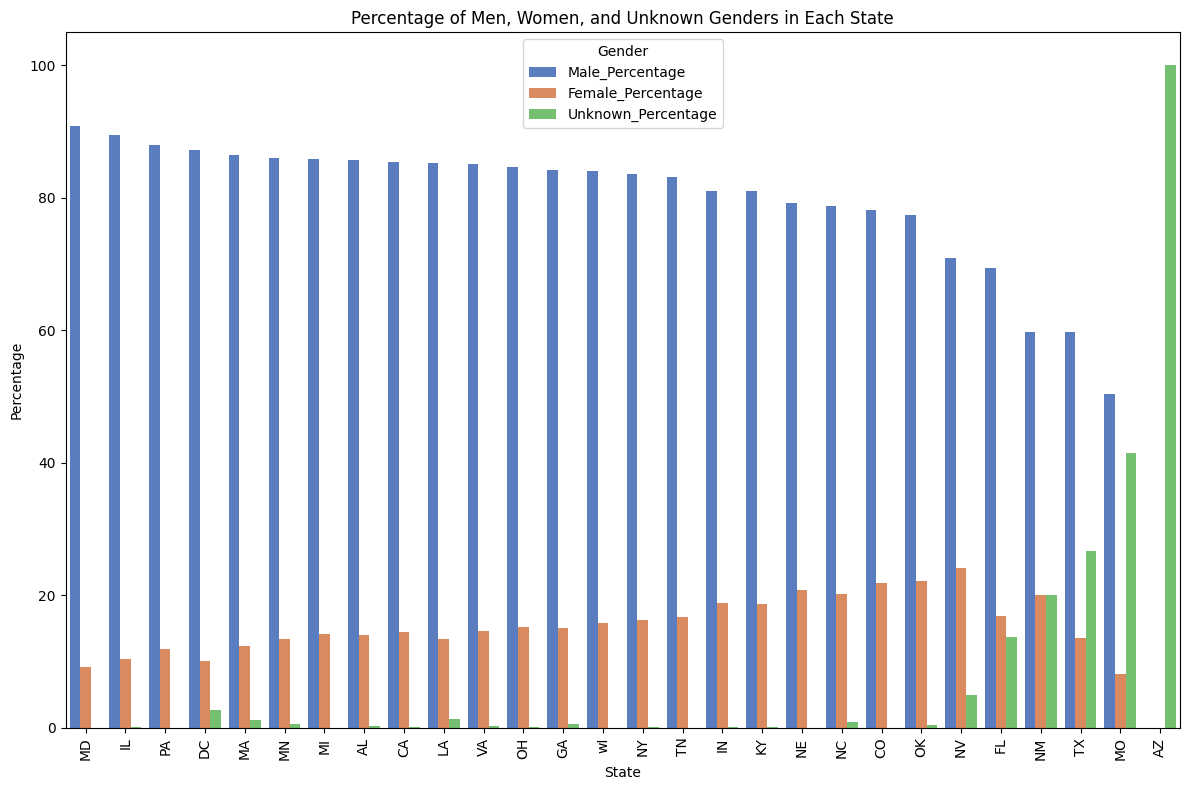

In [14]:
grouped = homicide_data.groupby(['state', 'victim_sex']).size().unstack(fill_value=0)
grouped['Total'] = grouped.sum(axis=1)
grouped['Male_Percentage'] = (grouped['Male'] / grouped['Total']) * 100
grouped['Female_Percentage'] = (grouped['Female'] / grouped['Total']) * 100
grouped['Unknown_Percentage'] = (grouped['Unknown'] / grouped['Total']) * 100

# Sorting states by the percentage of men
sorted_states = grouped.sort_values('Male_Percentage', ascending=False).index

# Reordering the DataFrame according to sorted states
grouped = grouped.loc[sorted_states]

# Reshape the data for plotting
stacked_data = grouped[['Male_Percentage', 'Female_Percentage', 'Unknown_Percentage']].stack().reset_index()
stacked_data.columns = ['State', 'Gender', 'Percentage']

# Create the bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='State', y='Percentage', hue='Gender', data=stacked_data, palette='muted')
plt.title('Percentage of Men, Women, and Unknown Genders in Each State')
plt.xlabel('State')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

<Axes: >

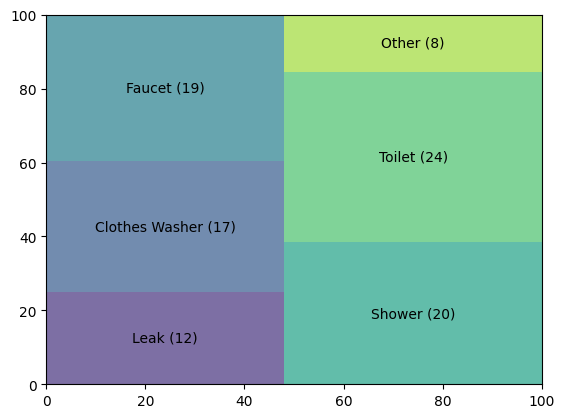

In [8]:
water_usage = pd.read_csv("data/water_usage.csv", index_col=0)
# cols Usage, Percentage
# Using squarify, plot the data as a treemap.
# Use the Percentage column to determine the area of the square.
# Use the Usage column to determine the color and label of the square.
# label = f"{water_usage['Usage']} ({water_usage['Percentage']})"
# CODE
labels = [f"{row.Usage} ({row.Percentage})" for row in water_usage.itertuples()]
squarify.plot(sizes=water_usage['Percentage'], label=labels, color=sns.color_palette('viridis', len(water_usage)), alpha=0.7)

In [9]:
# В ячейке процент негров по годам и штатам